<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Project Topic: Event Study of Shares Allotment and SPO Impact on China Stocks Price</h1>
<h3 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Author: JeffLin99, Email: jeffhengyu1999@hotmail.com</h3>

## Project Description:
### Selection of Events on Stock Price: Shares Allotment and Secondary Public Offering (SPO)

#### Anticipated outcomes:
#### (1) Two effects of shares allotment on the share price: the first is the fall in price due to ex-rights, and the second is the effect on the share price of the information conveyed by the act of allotment itself
#### (2) The two effects of SPO on the share price: firstly, the destination of the funds from the SPO will lead to a certain degree of volatility in the share price, and secondly, the number of SPO determines the attitude of investors towards the SPO.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Market data: using the SSE A-share index (000001)
<p> Source of Data：China Stock Market & Accounting Research Database（CSMAR）
<p> Data range：2021-01-01 to 2022-12-27

In [2]:
mktdf = pd.read_csv('Data\TRD_Dalym.csv',parse_dates=["Trddt"])
mktdf

,Markettype,Trddt,Dnshrtrdtl,Dnvaltrdtl,Dretwdeq,Dretmdeq,Dretwdos,Dretmdos,Dretwdtl,Dretmdtl,Dnstkcal
0,1,2021-01-04,37446416693,4.841582e+11,0.011567,0.011567,0.007501,0.007501,0.007971,0.007971,1570
1,1,2021-01-05,40145628545,5.293383e+11,-0.000064,-0.000064,0.007173,0.007173,0.007280,0.007280,1571
2,1,2021-01-06,36382905339,4.854939e+11,-0.008543,-0.008547,0.006657,0.006657,0.006425,0.006424,1571
3,1,2021-01-07,39841094800,5.040106e+11,-0.019179,-0.019179,0.008904,0.008904,0.007632,0.007632,1572
4,1,2021-01-08,33979781360,4.667141e+11,-0.001593,-0.001593,-0.002094,-0.002094,-0.001713,-0.001713,1572
...,...,...,...,...,...,...,...,...,...,...,...
477,1,2022-12-21,18122187781,1.958259e+11,-0.004437,-0.004437,-0.000213,-0.000213,-0.000534,-0.000534,1663
478,1,2022-12-22,21534135357,2.336125e+11,-0.012996,-0.013031,-0.003323,-0.003332,-0.003784,-0.003793,1666
479,1,2022-12-23,18289739065,1.980105e+11,-0.004056,-0.004056,-0.002230,-0.002230,-0.002213,-0.002213,1667
480,1,2022-12-26,19669002787,2.154998e+11,0.012438,0.012419,0.003847,0.003804,0.004345,0.004306,1664


## Stock data: SSE A-share market (excluding KSC)
<p> Source of Data：China Stock Market & Accounting Research Database（CSMAR）
<p> Data range：2021-01-01 to 2022-12-27

In [3]:
stkdf = pd.read_csv('Data\TRD_Dalyr.csv',parse_dates=["Trddt"])
stkdf

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta,Ahshrtrd_D,Ahvaltrd_D,PreClosePrice,ChangeRatio
0,600000,2021-01-04,9.64,9.73,9.55,9.69,62906939,606364959.0,2.844222e+08,2.844222e+08,...,0.001033,137.615272,88.191206,1,2020-12-31,1,0,0.0,9.68,0.001033
1,600000,2021-01-05,9.68,9.68,9.52,9.68,53859177,517135737.0,2.841287e+08,2.841287e+08,...,-0.001032,137.473254,88.100193,1,2020-12-31,1,0,0.0,9.69,-0.001032
2,600000,2021-01-06,9.62,9.83,9.62,9.82,61881321,604071110.0,2.882380e+08,2.882380e+08,...,0.014463,139.461504,89.374369,1,2020-12-31,1,0,0.0,9.68,0.014463
3,600000,2021-01-07,9.83,9.93,9.66,9.81,57090442,557051920.0,2.879445e+08,2.879445e+08,...,-0.001018,139.319486,89.283356,1,2020-12-31,1,0,0.0,9.82,-0.001018
4,600000,2021-01-08,9.83,9.90,9.73,9.83,55801455,547035205.0,2.885315e+08,2.885315e+08,...,0.002039,139.603522,89.465381,1,2020-12-31,1,0,0.0,9.81,0.002039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788736,605599,2022-12-21,9.43,9.61,9.38,9.50,1697414,16133249.0,5.573439e+06,7.388889e+06,...,0.013874,9.805628,9.500000,1,2022-09-09,1,0,0.0,9.37,0.013874
788737,605599,2022-12-22,9.55,9.69,9.43,9.48,2263598,21656720.0,5.561706e+06,7.373334e+06,...,-0.002105,9.784985,9.480000,1,2022-09-09,1,0,0.0,9.50,-0.002105
788738,605599,2022-12-23,9.51,9.55,9.28,9.31,2153220,20230283.0,5.461970e+06,7.241111e+06,...,-0.017932,9.609516,9.310000,1,2022-09-09,1,0,0.0,9.48,-0.017932
788739,605599,2022-12-26,9.39,9.48,9.29,9.40,1676200,15768783.0,5.514771e+06,7.311111e+06,...,0.009667,9.702411,9.400000,1,2022-09-09,1,0,0.0,9.31,0.009667


#### Merging market and stock data

In [4]:
prcdf = pd.merge(stkdf,mktdf,on=['Trddt'],how='inner')
prcdf

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Markettype_y,Dnshrtrdtl,Dnvaltrdtl,Dretwdeq,Dretmdeq,Dretwdos,Dretmdos,Dretwdtl,Dretmdtl,Dnstkcal
0,600000,2021-01-04,9.64,9.73,9.55,9.69,62906939,6.063650e+08,2.844222e+08,2.844222e+08,...,1,37446416693,4.841582e+11,0.011567,0.011567,0.007501,0.007501,0.007971,0.007971,1570
1,600004,2021-01-04,14.10,14.17,13.83,14.04,19132196,2.676319e+08,2.905326e+07,3.322872e+07,...,1,37446416693,4.841582e+11,0.011567,0.011567,0.007501,0.007501,0.007971,0.007971,1570
2,600006,2021-01-04,8.95,9.47,8.71,9.22,183116433,1.682616e+09,1.844000e+07,1.844000e+07,...,1,37446416693,4.841582e+11,0.011567,0.011567,0.007501,0.007501,0.007971,0.007971,1570
3,600007,2021-01-04,12.45,12.55,12.25,12.40,1444646,1.789063e+07,1.249030e+07,1.249030e+07,...,1,37446416693,4.841582e+11,0.011567,0.011567,0.007501,0.007501,0.007971,0.007971,1570
4,600008,2021-01-04,2.86,2.87,2.84,2.86,42598295,1.217417e+08,2.099409e+07,2.099409e+07,...,1,37446416693,4.841582e+11,0.011567,0.011567,0.007501,0.007501,0.007971,0.007971,1570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788736,605580,2022-12-27,11.85,11.98,11.81,11.94,533284,6.347224e+06,6.102534e+05,2.388000e+06,...,1,21273712239,2.272313e+11,0.006472,0.006456,0.010150,0.009387,0.010181,0.009461,1666
788737,605588,2022-12-27,28.87,29.21,28.63,29.10,276600,8.005958e+06,6.721972e+05,2.127197e+06,...,1,21273712239,2.272313e+11,0.006472,0.006456,0.010150,0.009387,0.010181,0.009461,1666
788738,605589,2022-12-27,22.28,22.67,21.95,22.52,8634582,1.939842e+08,1.385457e+07,1.763039e+07,...,1,21273712239,2.272313e+11,0.006472,0.006456,0.010150,0.009387,0.010181,0.009461,1666
788739,605598,2022-12-27,27.36,29.20,26.58,27.20,4308000,1.177613e+08,1.431902e+06,4.698622e+06,...,1,21273712239,2.272313e+11,0.006472,0.006456,0.010150,0.009387,0.010181,0.009461,1666


## Event study data: share allotment and SPO of listed companies
<p> Source of Data：China Stock Market & Accounting Research Database（CSMAR）
<p> Date range：2021-01-01 to 2022-08-15

In [5]:
rsdf = pd.read_csv('Data\RS_Robacdler.csv',parse_dates=['Annodt'])
rsdf.sort_values(['Stkcd','Annodt'],inplace=True)
# As the event data interval is two years, data greater than 2021-07-01 is chosen here to ensure that there is sufficient data for model estimation before the event occurs
rsdf = rsdf.loc[(rsdf['Annodt'] >= '2021-07-01')]
# Define to discard the data for each stock with more than one allotment or issue, and keep only the most recent set of data.
# Here there is no need to worry about the lack of stock data after the event as the last day of event data is 2022-08-15
def drop_dup(data):
    data.drop_duplicates(subset=['Stkcd'],keep='last',inplace=True)
    return data
## Run the above function according to Sign = 1 (Share allotment) or 2 (SPO)
rsdf = rsdf.groupby('Sign').apply(drop_dup)
rsdf.reset_index(drop=True,inplace=True)
rsdf

,Stkcd,Sign,Annodt,Trddt,Dlernra
0,65,1,2022-03-30,2022-02-11,-0.014002
1,970,1,2022-02-11,2022-04-13,-0.028571
2,2142,1,2021-11-19,2021-09-14,-0.027754
3,2948,1,2021-12-30,2021-11-25,0.000000
4,300475,1,2022-08-08,2022-08-09,-0.019821
...,...,...,...,...,...
452,688339,2,2021-08-11,2021-08-11,0.154315
453,688357,2,2022-03-30,2022-04-22,-0.020256
454,688568,2,2022-07-18,2022-11-25,-0.008200
455,688598,2,2022-07-28,2022-07-28,0.063894


## Define Event

#### Since in this study we are dealing with the case of abnormal stock price gains from share allotment or SPO events and the data has been expressed in terms of Sign = 1/2, it is directly quoted

In [6]:
## Extract the required current rows and columns of data
evtdf = rsdf.loc[:,['Stkcd','Annodt','Sign']]
evtdf

,Stkcd,Annodt,Sign
0,65,2022-03-30,1
1,970,2022-02-11,1
2,2142,2021-11-19,1
3,2948,2021-12-30,1
4,300475,2022-08-08,1
...,...,...,...
452,688339,2021-08-11,2
453,688357,2022-03-30,2
454,688568,2022-07-18,2
455,688598,2022-07-28,2


#### Re-merge the event study data with the previously merged data

In [7]:
prcevt = pd.merge(prcdf,evtdf,how='inner',on=['Stkcd'])
prcevt

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Dnvaltrdtl,Dretwdeq,Dretmdeq,Dretwdos,Dretmdos,Dretwdtl,Dretmdtl,Dnstkcal,Annodt,Sign
0,600009,2021-01-04,75.70,78.77,75.17,77.49,21988631,1.697401e+09,84733486.00,1.493200e+08,...,4.841582e+11,0.011567,0.011567,0.007501,0.007501,0.007971,0.007971,1570,2022-07-29,2
1,600009,2021-01-05,77.50,77.50,76.00,77.30,19566758,1.500784e+09,84525725.49,1.489539e+08,...,5.293383e+11,-0.000064,-0.000064,0.007173,0.007173,0.007280,0.007280,1571,2022-07-29,2
2,600009,2021-01-06,77.11,79.48,76.80,77.49,20026511,1.557279e+09,84733486.00,1.493200e+08,...,4.854939e+11,-0.008543,-0.008547,0.006657,0.006657,0.006425,0.006424,1571,2022-07-29,2
3,600009,2021-01-07,77.66,77.96,75.00,75.85,22682522,1.726425e+09,82940184.71,1.461598e+08,...,5.040106e+11,-0.019179,-0.019179,0.008904,0.008904,0.007632,0.007632,1572,2022-07-29,2
4,600009,2021-01-08,76.15,77.12,75.43,75.98,16197113,1.231963e+09,83082336.64,1.464103e+08,...,4.667141e+11,-0.001593,-0.001593,-0.002094,-0.002094,-0.001713,-0.001713,1572,2022-07-29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77826,605368,2022-12-21,12.69,12.78,12.45,12.50,1565300,1.969630e+07,2216525.00,6.185704e+06,...,1.958259e+11,-0.004437,-0.004437,-0.000213,-0.000213,-0.000534,-0.000534,1663,2022-06-20,2
77827,605368,2022-12-22,12.59,12.66,12.27,12.32,1494900,1.858257e+07,2184607.04,6.096630e+06,...,2.336125e+11,-0.012996,-0.013031,-0.003323,-0.003332,-0.003784,-0.003793,1666,2022-06-20,2
77828,605368,2022-12-23,12.39,12.40,12.13,12.28,1389000,1.705211e+07,2177514.16,6.076836e+06,...,1.980105e+11,-0.004056,-0.004056,-0.002230,-0.002230,-0.002213,-0.002213,1667,2022-06-20,2
77829,605368,2022-12-26,12.30,12.43,12.24,12.41,1230700,1.519914e+07,2200566.02,6.141167e+06,...,2.154998e+11,0.012438,0.012419,0.003847,0.003804,0.004345,0.004306,1664,2022-06-20,2


#### Calculate Trading Days Difference

In [8]:
prcevt.sort_values(['Stkcd','Trddt'])
evtsn=prcevt.groupby('Stkcd').apply(lambda x:x[x['Trddt']>=x['Annodt']].index[0])
evtsn.name='evtsn'
prcevt=pd.merge(prcevt,evtsn,on='Stkcd',how='inner')
prcevt['sn']=prcevt.index-prcevt['evtsn']
prcevt

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Dretmdeq,Dretwdos,Dretmdos,Dretwdtl,Dretmdtl,Dnstkcal,Annodt,Sign,evtsn,sn
0,600009,2021-01-04,75.70,78.77,75.17,77.49,21988631,1.697401e+09,84733486.00,1.493200e+08,...,0.011567,0.007501,0.007501,0.007971,0.007971,1570,2022-07-29,2,369,-369
1,600009,2021-01-05,77.50,77.50,76.00,77.30,19566758,1.500784e+09,84525725.49,1.489539e+08,...,-0.000064,0.007173,0.007173,0.007280,0.007280,1571,2022-07-29,2,369,-368
2,600009,2021-01-06,77.11,79.48,76.80,77.49,20026511,1.557279e+09,84733486.00,1.493200e+08,...,-0.008547,0.006657,0.006657,0.006425,0.006424,1571,2022-07-29,2,369,-367
3,600009,2021-01-07,77.66,77.96,75.00,75.85,22682522,1.726425e+09,82940184.71,1.461598e+08,...,-0.019179,0.008904,0.008904,0.007632,0.007632,1572,2022-07-29,2,369,-366
4,600009,2021-01-08,76.15,77.12,75.43,75.98,16197113,1.231963e+09,83082336.64,1.464103e+08,...,-0.001593,-0.002094,-0.002094,-0.001713,-0.001713,1572,2022-07-29,2,369,-365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77826,605368,2022-12-21,12.69,12.78,12.45,12.50,1565300,1.969630e+07,2216525.00,6.185704e+06,...,-0.004437,-0.000213,-0.000213,-0.000534,-0.000534,1663,2022-06-20,2,77700,126
77827,605368,2022-12-22,12.59,12.66,12.27,12.32,1494900,1.858257e+07,2184607.04,6.096630e+06,...,-0.013031,-0.003323,-0.003332,-0.003784,-0.003793,1666,2022-06-20,2,77700,127
77828,605368,2022-12-23,12.39,12.40,12.13,12.28,1389000,1.705211e+07,2177514.16,6.076836e+06,...,-0.004056,-0.002230,-0.002230,-0.002213,-0.002213,1667,2022-06-20,2,77700,128
77829,605368,2022-12-26,12.30,12.43,12.24,12.41,1230700,1.519914e+07,2200566.02,6.141167e+06,...,0.012419,0.003847,0.003804,0.004345,0.004306,1664,2022-06-20,2,77700,129


#### Define a market regression model that outputs a constant term (Alpha), regression coefficients (Beta) and a disturbance term (Resid)

In [9]:
def estimatemodel(data):
    model = sm.OLS(data['Dretwd'],sm.add_constant(data['Dretwdeq'])).fit()
    result = model.params
    result['sig2_ar'] = model.mse_resid
    return result

#### Set the calendar of events for the estimated start (begest), the calendar of events for the estimated end (endest), the start date of the event (begevt) and the end date of the event (endevt)

In [10]:
begest = -120
endest = -6
begevt = -5
endevt = 5

#### Beginning of regression

In [11]:
## Select the data under the estimation window
estdata = prcevt.loc[(prcevt['sn'] >= begest) & (prcevt['sn'] <= endest),:]
## Estimate for each stock and output the results
regresult = estdata.groupby('Stkcd').apply(estimatemodel)
regresult.columns=['alpha','beta','sig2_ar']
regresult['sig2_ar'] = regresult['sig2_ar'].astype(float) ## As the output format is Object, it is changed to float.
regresult.dropna(axis=0,inplace=True)
regresult

,alpha,beta,sig2_ar
Stkcd,,,
600009,-0.000231,1.003451,0.000575
600021,-0.001608,1.193980,0.000914
600027,0.000616,0.950539,0.000386
600030,-0.000160,0.722145,0.000250
600055,0.003895,1.363104,0.001186
...,...,...,...
605266,-0.001690,1.039803,0.000348
605333,0.002248,1.215559,0.001590
605358,0.002818,0.783011,0.002164


#### Data for the event interval were selected and the abnormal return on stocks was derived by subtracting the normal return on stocks estimated under the market regression model from the actual return on stocks obtained (ar)

In [12]:
evtdata=pd.merge(prcevt.loc[(prcevt['sn']>=begevt) & (prcevt['sn']<=endevt)],regresult,how='inner',on='Stkcd')
evtdata['ar'] = evtdata['Dretwd']-evtdata['alpha']-evtdata['beta']*evtdata['Dretwdeq']
evtdata

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Dretmdtl,Dnstkcal,Annodt,Sign,evtsn,sn,alpha,beta,sig2_ar,ar
0,600009,2022-07-22,51.00,52.94,50.80,52.35,14631907,765225683.0,57243489.38,1.008763e+08,...,-0.000114,1653,2022-07-29,2,369,-5,-0.000231,1.003451,0.000575,0.028296
1,600009,2022-07-25,52.37,52.37,51.28,51.55,8013157,414405266.0,56368708.27,9.933471e+07,...,-0.005646,1652,2022-07-29,2,369,-4,-0.000231,1.003451,0.000575,-0.008381
2,600009,2022-07-26,51.95,54.01,51.93,52.75,18044427,956127251.0,57680879.94,1.016471e+08,...,0.008413,1654,2022-07-29,2,369,-3,-0.000231,1.003451,0.000575,0.012477
3,600009,2022-07-27,52.27,53.93,52.21,53.13,11548970,614364475.0,58096400.97,1.023793e+08,...,-0.002009,1653,2022-07-29,2,369,-2,-0.000231,1.003451,0.000575,0.002080
4,600009,2022-07-28,53.40,54.50,53.23,53.42,13697014,738670889.0,58413509.13,1.029381e+08,...,0.000961,1653,2022-07-29,2,369,-1,-0.000231,1.003451,0.000575,0.000072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,605368,2022-06-21,13.15,13.18,12.84,13.04,2575400,33472622.0,2169371.89,6.452927e+06,...,-0.001828,1654,2022-06-20,2,77700,1,0.000727,0.676305,0.000201,-0.001711
1778,605368,2022-06-22,13.02,13.04,12.79,12.80,2313830,29783552.0,2129444.80,6.334161e+06,...,-0.011476,1654,2022-06-20,2,77700,2,0.000727,0.676305,0.000201,-0.011766
1779,605368,2022-06-23,12.80,12.80,12.57,12.75,2904500,36820459.0,2121126.66,6.309418e+06,...,0.015425,1655,2022-06-20,2,77700,3,0.000727,0.676305,0.000201,-0.015255
1780,605368,2022-06-24,12.73,12.84,12.66,12.79,1983000,25309289.0,2127781.17,6.329213e+06,...,0.008402,1651,2022-06-20,2,77700,4,0.000727,0.676305,0.000201,-0.003921


#### Cumulative abnormal returns (car) for the event interval are derived by accumulating abnormal returns (ar) by respective stock

In [13]:
evtdata['car']=evtdata.groupby('Stkcd')['ar'].apply(np.cumsum)
evtdata

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_16428\3778075217.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  evtdata['car']=evtdata.groupby('Stkcd')['ar'].apply(np.cumsum)


,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Dnstkcal,Annodt,Sign,evtsn,sn,alpha,beta,sig2_ar,ar,car
0,600009,2022-07-22,51.00,52.94,50.80,52.35,14631907,765225683.0,57243489.38,1.008763e+08,...,1653,2022-07-29,2,369,-5,-0.000231,1.003451,0.000575,0.028296,0.028296
1,600009,2022-07-25,52.37,52.37,51.28,51.55,8013157,414405266.0,56368708.27,9.933471e+07,...,1652,2022-07-29,2,369,-4,-0.000231,1.003451,0.000575,-0.008381,0.019916
2,600009,2022-07-26,51.95,54.01,51.93,52.75,18044427,956127251.0,57680879.94,1.016471e+08,...,1654,2022-07-29,2,369,-3,-0.000231,1.003451,0.000575,0.012477,0.032393
3,600009,2022-07-27,52.27,53.93,52.21,53.13,11548970,614364475.0,58096400.97,1.023793e+08,...,1653,2022-07-29,2,369,-2,-0.000231,1.003451,0.000575,0.002080,0.034473
4,600009,2022-07-28,53.40,54.50,53.23,53.42,13697014,738670889.0,58413509.13,1.029381e+08,...,1653,2022-07-29,2,369,-1,-0.000231,1.003451,0.000575,0.000072,0.034545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,605368,2022-06-21,13.15,13.18,12.84,13.04,2575400,33472622.0,2169371.89,6.452927e+06,...,1654,2022-06-20,2,77700,1,0.000727,0.676305,0.000201,-0.001711,-0.074479
1778,605368,2022-06-22,13.02,13.04,12.79,12.80,2313830,29783552.0,2129444.80,6.334161e+06,...,1654,2022-06-20,2,77700,2,0.000727,0.676305,0.000201,-0.011766,-0.086245
1779,605368,2022-06-23,12.80,12.80,12.57,12.75,2904500,36820459.0,2121126.66,6.309418e+06,...,1655,2022-06-20,2,77700,3,0.000727,0.676305,0.000201,-0.015255,-0.101500
1780,605368,2022-06-24,12.73,12.84,12.66,12.79,1983000,25309289.0,2127781.17,6.329213e+06,...,1651,2022-06-20,2,77700,4,0.000727,0.676305,0.000201,-0.003921,-0.105421


## Impact of events on equity portfolios：aggregation across stocks $\frac{1}{N} \sum_{i=1}^N{CAR_i(\tau_1,\tau_2)}$

In [14]:
carbycode=evtdata.groupby(['Sign','sn'])['car'].mean()

#### Plot the average cumulative abnormal return for all stocks for each day of the event interval

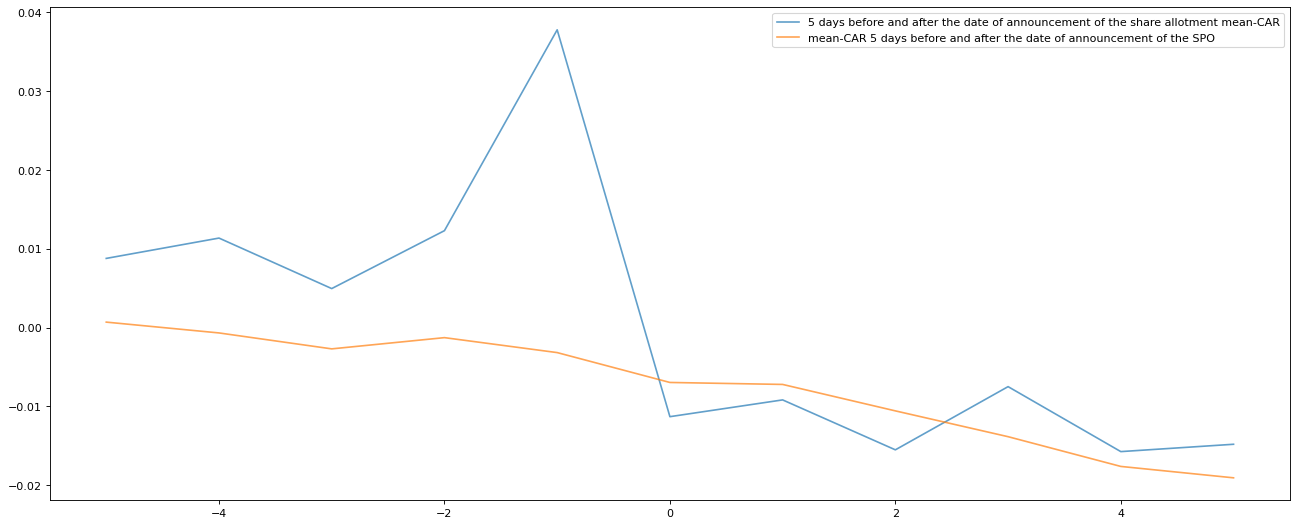

In [15]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(carbycode[1], label = '5 days before and after the date of announcement of the share allotment mean-CAR',alpha=0.7)
plt.plot(carbycode[2], label = 'mean-CAR 5 days before and after the date of announcement of the SPO',alpha=0.7)
plt.legend()

#### In terms of results, the cumulative abnormal returns demonstrated in the five days before and after the announcement date of the share allotment and the SPO, the former appear to have a sharp downward trend in CAR the day before the event, while the latter appear to have a slow and continuous downward trend in CAR

### Hypothesis testing: Null hypothesis: event has no effect on stock returns (including mean and variance)

In [16]:
evtdata['scar'] = evtdata['car']/np.sqrt((evtdata['sn']-begevt+1)*evtdata['sig2_ar'].astype(float))
evtdata

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Annodt,Sign,evtsn,sn,alpha,beta,sig2_ar,ar,car,scar
0,600009,2022-07-22,51.00,52.94,50.80,52.35,14631907,765225683.0,57243489.38,1.008763e+08,...,2022-07-29,2,369,-5,-0.000231,1.003451,0.000575,0.028296,0.028296,1.180259
1,600009,2022-07-25,52.37,52.37,51.28,51.55,8013157,414405266.0,56368708.27,9.933471e+07,...,2022-07-29,2,369,-4,-0.000231,1.003451,0.000575,-0.008381,0.019916,0.587388
2,600009,2022-07-26,51.95,54.01,51.93,52.75,18044427,956127251.0,57680879.94,1.016471e+08,...,2022-07-29,2,369,-3,-0.000231,1.003451,0.000575,0.012477,0.032393,0.780075
3,600009,2022-07-27,52.27,53.93,52.21,53.13,11548970,614364475.0,58096400.97,1.023793e+08,...,2022-07-29,2,369,-2,-0.000231,1.003451,0.000575,0.002080,0.034473,0.718941
4,600009,2022-07-28,53.40,54.50,53.23,53.42,13697014,738670889.0,58413509.13,1.029381e+08,...,2022-07-29,2,369,-1,-0.000231,1.003451,0.000575,0.000072,0.034545,0.644383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,605368,2022-06-21,13.15,13.18,12.84,13.04,2575400,33472622.0,2169371.89,6.452927e+06,...,2022-06-20,2,77700,1,0.000727,0.676305,0.000201,-0.001711,-0.074479,-1.983715
1778,605368,2022-06-22,13.02,13.04,12.79,12.80,2313830,29783552.0,2129444.80,6.334161e+06,...,2022-06-20,2,77700,2,0.000727,0.676305,0.000201,-0.011766,-0.086245,-2.148741
1779,605368,2022-06-23,12.80,12.80,12.57,12.75,2904500,36820459.0,2121126.66,6.309418e+06,...,2022-06-20,2,77700,3,0.000727,0.676305,0.000201,-0.015255,-0.101500,-2.384195
1780,605368,2022-06-24,12.73,12.84,12.66,12.79,1983000,25309289.0,2127781.17,6.329213e+06,...,2022-06-20,2,77700,4,0.000727,0.676305,0.000201,-0.003921,-0.105421,-2.349213


In [17]:
evtstat = evtdata.groupby(['Sign','sn'])['scar'].agg([np.mean,len])
patell_t = evtstat['mean']*np.sqrt(evtstat['len'])
patell_t

Sign  sn
1     -5    1.398349
      -4    0.982554
      -3    0.328069
      -2    0.566275
      -1    2.054117
       0   -0.319809
       1   -0.026641
       2   -0.298864
       3    0.121128
       4   -0.122196
       5   -0.027970
2     -5    0.590219
      -4   -0.150114
      -3   -0.670056
      -2   -0.421566
      -1   -0.560513
       0   -1.299343
       1   -1.081360
       2   -1.552830
       3   -2.060320
       4   -2.412885
       5   -2.426047
dtype: float64

#### According to the above test results, it can be seen that for the event of share allotment, there is a significant impact of abnormal stock returns one day before the event, which can reject the original hypothesis at 5% significance level, indicating that the event of share allotment before the occurrence of the event has already been an investor may be through insider trading trading in advance of the trading operation; on the contrary, for the event of the SPO can be rejected mainly in the event of the occurrence of the event of the 3 days after the significance of the 5% significance level, indicating that the event of the issuance of additional shares on the return of the stock is a certain lagging effect.

### Null hypothesis: events have no effect on mean stock returns (volatility can bring effect)

In [18]:
cross_t = evtdata.groupby(['Sign','sn'])['car'].apply(lambda x: stats.ttest_1samp(x,0))
cross_t

Sign  sn
1     -5        (0.966451738584367, 0.3885467168115431)
      -4       (1.8186661945525233, 0.1430986682735345)
      -3       (0.4986359568988351, 0.6442094738588384)
      -2       (0.972827379308373, 0.38572590700662107)
      -1       (2.466186622928719, 0.06922965589407024)
       0      (-0.5701147137686594, 0.5990953546701353)
       1     (-0.30252420693819865, 0.7773315381156385)
       2      (-0.5725603118538245, 0.5975878004880544)
       3     (-0.20049886813451875, 0.8508720780948689)
       4     (-0.34693380934204093, 0.7461246227176355)
       5      (-0.3098408956224631, 0.7721528217331622)
2     -5        (0.3104026153498944, 0.756669120078218)
      -4      (-0.2080215933704585, 0.8354834405331684)
      -3      (-0.6265109050585965, 0.5318956011012468)
      -2      (-0.2793376041412867, 0.7803557486441223)
      -1        (-0.66613380891491, 0.5063094455707378)
       0     (-1.2810508463051542, 0.20207691917267379)
       1     (-1.2773948922278175, 0.20

#### The t-statistical test results of the above cross-sectional cumulative abnormal returns show that the day before the share allotment event can reject the original hypothesis at the 10% significance level, indicating that the day before the event does have a significant impact on the mean value of stock returns; on the contrary, for the SPO events can be 3-5 days after the event can be 3-5 days after the occurrence of the event can be rejected at the 5% significance level of the original hypothesis, indicating that the investors for the majority of the increase in the event of the issue of the relative resistance and aversion to the event, resulting in the stock fluctuation abnormality, the mean value of the return tends to decline.

In [19]:
boehmer_t = evtdata.groupby(['Sign','sn'])['scar'].apply(lambda x: stats.ttest_1samp(x,0))
boehmer_t

Sign  sn
1     -5       (1.3495555939040251, 0.2484813973893432)
      -4      (2.0741905389562145, 0.10672243224220555)
      -3        (0.472432192164458, 0.6612405421092317)
      -2       (0.7695040013998853, 0.4845163468096611)
      -1      (2.1704865027022904, 0.09575797109536006)
       0     (-0.31618373021962326, 0.7676749652064435)
       1     (-0.01902344476836956, 0.9857334920124876)
       2     (-0.28574967963261694, 0.7892569413533774)
       3       (0.0844627058012276, 0.9367469435213954)
       4      (-0.0825347442944734, 0.9381866326930529)
       5    (-0.018471502206527393, 0.9861473580084674)
2     -5        (0.560309491282611, 0.5760721213582445)
      -4      (-0.1235300222815576, 0.9018464165936164)
      -3      (-0.5387501291394008, 0.5908272432285204)
      -2      (-0.3618606720869682, 0.7179458326820716)
      -1        (-0.5218651724512067, 0.60250438923245)
       0       (-1.203241888420818, 0.2307055701234612)
       1     (-1.0244241690453006, 0.30

#### The results of the t-statistical test of the cross-section of the standardised car by means of Boehmer's method are very similar to the previous one.

### (Sign test) Null hypothesis: P(cumulative abnormal return > 0) = 0.5

In [20]:
evtdata['poscar'] = evtdata['car']>0
evtstat2 = evtdata.groupby(['Sign','sn'])['poscar'].agg([np.mean,len])

In [21]:
sign_t = (evtstat2['mean']-0.5)/np.sqrt(0.25/evtstat2['len'])
sign_t

Sign  sn
1     -5    1.341641
      -4    1.341641
      -3   -0.447214
      -2    0.447214
      -1    1.341641
       0   -1.341641
       1   -0.447214
       2   -0.447214
       3    0.447214
       4    0.447214
       5    0.447214
2     -5   -1.037513
      -4   -0.558661
      -3   -2.154835
      -2   -1.356748
      -1   -1.037513
       0   -0.877896
       1   -1.995217
       2   -1.995217
       3   -2.474069
       4   -2.793304
       5   -3.112539
dtype: float64

#### The results of the sign test indicate that share allotment events in the cross-section do not exhibit significant positive or negative shocks to stock prices; whereas SPO events exhibit some negative shocks, particularly significant on the 3rd day before and the 5th consecutive day after the event.

### Cross-sectional analysis (is it relevant to the market value of the company (Dsmvosd)?)

In [22]:
def crossreg(data):
    model = sm.OLS(data['car'],sm.add_constant(np.log(data['Dsmvosd']))).fit()
    return model.summary()

In [23]:
allresults = evtdata.groupby('sn').apply(crossreg)
allresults[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    car   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.002575
Date:                Sat, 12 Aug 2023   Prob (F-statistic):              0.960
Time:                        14:35:29   Log-Likelihood:                 207.25
No. Observations:                 162   AIC:                            -410.5
Df Residuals:                     160   BIC:                            -404.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0035      0.071     -0.049      0.961      -0.144       0.137
Dsmvosd       -0.0002      0.004     -0.051      0.960      -0.009       0.009
==============================================================================
Omnibus:                       10.748   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               18.141
Skew:                           0.310   Prob(JB):                     0.000115
Kurtosis:                       4.517   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The cross-sectional results suggest that company market capitalisation is not a factor that leads to abnormal returns in the above share allotment nor SPO events.